[*********************100%***********************]  1 of 1 completed


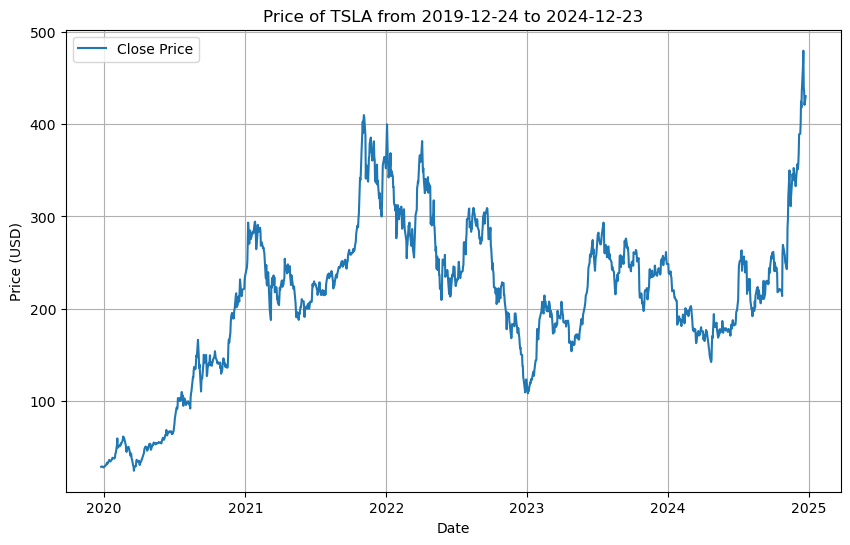

In [120]:
# Import necessary libraries
import numpy as np
np.random.seed(3363)
import pandas as pd
from scipy.stats import norm
import datetime 
import matplotlib.pyplot as plt
%matplotlib inline

# Import yfinance and download data
import yfinance as yf

ticker = "TSLA"  # Tesla Stock
df = yf.download(ticker, period='5y')

# Import necessary libraries
import matplotlib.pyplot as plt

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label="Close Price")
plt.title(f"Price of {ticker} from {df.index.min().date()} to {df.index.max().date()}")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)  # Optional: Add a grid for better readability
plt.savefig("tsla time series.png")
plt.show()


In [72]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import datetime
import matplotlib.pyplot as plt

def monte_carlo(pred_end_date, df, iterations=1000, plot=True):
    # Validate date range
    if pred_end_date <= df.index.max():
        raise ValueError("Prediction end date must be later than the last available date in the data.")

    # Generate business days between the last available date and the prediction end date
    forecast_dates = pd.date_range(start=df.index.max() + pd.Timedelta(days=1), end=pred_end_date, freq='B')
    
    # Validate forecast_dates
    if forecast_dates.empty:
        raise ValueError("No forecast dates generated. Check the input date range.")

    # Number of intervals
    intervals = len(forecast_dates)

    # Prepare log returns from data
    log_returns = np.log(1 + df['Close'].pct_change().dropna())

    # Setting up drift and random component in relation to asset data
    u = log_returns.mean()
    var = log_returns.var()
    drift = u - (0.5 * var)
    stdev = log_returns.std()
    daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(intervals, iterations)))

    # Initialize price list for simulation
    price_list = np.zeros((intervals, iterations))
    price_list[0] = df['Close'].iloc[-1]

    # Apply Monte Carlo simulation
    for t in range(1, intervals):
        price_list[t] = price_list[t - 1] * daily_returns[t]

    # Convert results into DataFrame with correct index
    forecast_df = pd.DataFrame(price_list, index=forecast_dates)

    # Plot if needed
    if plot:
        forecast_df.plot(figsize=(10, 6), legend=False, title=f"{iterations} Simulated Future Paths")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.grid(True)
        plt.show()

    # Extract the final simulated values
    end_values_df = forecast_df.iloc[-1]

    return forecast_df, end_values_df

def plot_norm_hist(s, vline=True, title=True):
    mu, sigma = np.mean(s), np.std(s)  # Mean and standard deviation

    # Plot histogram and normal distribution
    count, bins, ignored = plt.hist(s, bins=30, density=True, alpha=0.75, color='blue')
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
             np.exp(-(bins - mu)**2 / (2 * sigma**2)),
             linewidth=2, color='red')

    # Add vertical lines for ±0.67σ (arbitrary choice for spread)
    if vline:
        lline = -0.67 * sigma + mu
        uline = 0.67 * sigma + mu
        plt.axvline(lline, color='green', linestyle='--', label=f"Lower Bound ({lline:.2f})")
        plt.axvline(uline, color='green', linestyle='--', label=f"Upper Bound ({uline:.2f})")

    # Add title and labels
    if title:
        plt.title(f"Final Price Distribution\nMean: ${mu:.2f}, Std Dev: ${sigma:.2f}")
    plt.xlabel("Price")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)

    plt.show()

# Example usage
ticker = "TSLA"
import yfinance as yf
df = yf.download(ticker, period='5y')

# Ensure prediction end date is valid
pred_end_date = datetime.datetime(2025, 7, 1)

try:
    forecast_df, end_values_df = monte_carlo(pred_end_date, df)
    # Plot the final price distribution
    plot_norm_hist(end_values_df.values.flatten(), vline=True, title=True)
except ValueError as e:
    print(e)


[*********************100%***********************]  1 of 1 completed

Length of values (136) does not match length of index (1)


In [68]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import datetime
import matplotlib.pyplot as plt

def monte_carlo(pred_end_date, df, iterations=1000, plot=True):
    # Print debug information
    print(f"Last date in data: {df.index.max()}")
    print(f"Prediction end date: {pred_end_date}")

    # Validate date range
    if pred_end_date <= df.index.max():
        raise ValueError("Prediction end date must be later than the last available date in the data.")

    # Generate business days between the last available date and the prediction end date
    forecast_dates = pd.date_range(start=df.index.max() + pd.Timedelta(days=1), end=pred_end_date, freq='B')
    
    # Validate forecast_dates
    if forecast_dates.empty:
        raise ValueError("No forecast dates generated. Check the input date range.")
    print(f"Forecast dates generated: {len(forecast_dates)} days")

    # Number of intervals
    intervals = len(forecast_dates)

    # Prepare log returns from data
    log_returns = np.log(1 + df['Close'].pct_change().dropna())
    print(f"Log returns mean: {log_returns.mean()}, variance: {log_returns.var()}, standard deviation: {log_returns.std()}")

    # Setting up drift and random component in relation to asset data
    u = log_returns.mean()
    var = log_returns.var()
    drift = u - (0.5 * var)
    stdev = log_returns.std()
    daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(intervals, iterations)))

    # Initialize price list for simulation
    price_list = np.zeros((intervals, iterations))
    price_list[0] = df['Close'].iloc[-1]
    print(f"Starting price: {df['Close'].iloc[-1]}")

    # Apply Monte Carlo simulation
    for t in range(1, intervals):
        price_list[t] = price_list[t - 1] * daily_returns[t]

    # Convert results into DataFrame with correct index
    forecast_df = pd.DataFrame(price_list, index=forecast_dates)

    # Plot if needed
    if plot:
        forecast_df.plot(figsize=(10, 6), legend=False, title=f"{iterations} Simulated Future Paths")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.grid(True)
        plt.show()

    # Extract the final simulated values
    end_values_df = forecast_df.iloc[-1]

    return forecast_df, end_values_df

# Example usage
ticker = "TSLA"
import yfinance as yf
df = yf.download(ticker, period='5y')

# Ensure prediction end date is valid
pred_end_date = datetime.datetime(2025, 7, 1)

try:
    forecast_df, end_values_df = monte_carlo(pred_end_date, df)
    print(f"Simulated end values:\n{end_values_df}")
except ValueError as e:
    print(e)


[*********************100%***********************]  1 of 1 completed

Last date in data: 2024-12-23 00:00:00
Prediction end date: 2025-07-01 00:00:00
Forecast dates generated: 136 days
Log returns mean: Ticker
TSLA    0.002164
dtype: float64, variance: Ticker
TSLA    0.001775
dtype: float64, standard deviation: Ticker
TSLA    0.042129
dtype: float64
Length of values (136) does not match length of index (1)


In [28]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2019-12-24,28.350000,28.364668,27.512667,27.890667,120820500
2019-12-26,28.729334,28.898666,28.423332,28.527332,159508500
2019-12-27,28.691999,29.020666,28.407333,29.000000,149185500
2019-12-30,27.646667,28.600000,27.284000,28.586000,188796000
2019-12-31,27.888666,28.086000,26.805332,27.000000,154285500


In [32]:
df[( 'Close', 'TSLA')].values

array([ 28.35000038,  28.72933388,  28.69199944, ..., 436.17001343,
       421.05999756, 430.6000061 ])

In [80]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import datetime
import matplotlib.pyplot as plt

def monte_carlo(pred_end_date, df, iterations=1000, plot=True):
    # Validate date range
    if pred_end_date <= df.index.max():
        raise ValueError("Prediction end date must be later than the last available date in the data.")

    # Generate business days between the last available date and the prediction end date
    forecast_dates = pd.date_range(start=df.index.max() + pd.Timedelta(days=1), end=pred_end_date, freq='B')
    
    # Validate forecast_dates
    if forecast_dates.empty:
        raise ValueError("No forecast dates generated. Check the input date range.")

    # Number of intervals
    intervals = len(forecast_dates)

    # Prepare log returns from data
    log_returns = np.log(1 + df['Close'].pct_change().dropna())

    # Setting up drift and random component in relation to asset data
    u = log_returns.mean()
    var = log_returns.var()
    drift = u - (0.5 * var)
    stdev = log_returns.std()
    daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(intervals, iterations)))

    # Initialize price list for simulation
    price_list = np.zeros((intervals, iterations))
    price_list[0] = df['Close'].iloc[-1]

    # Apply Monte Carlo simulation
    for t in range(1, intervals):
        price_list[t] = price_list[t - 1] * daily_returns[t]

    # Convert results into DataFrame with correct index
    forecast_df = pd.DataFrame(price_list, index=forecast_dates)

    # Plot if needed
    if plot:
        forecast_df.plot(figsize=(10, 6), legend=False, title=f"{iterations} Simulated Future Paths")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.grid(True)
        plt.show()

    # Extract the final simulated values
    end_values_df = forecast_df.iloc[-1].values  # Extract the last row as a 1D array

    return forecast_df, end_values_df

def plot_norm_hist(s, vline=True, title=True):
    mu, sigma = np.mean(s), np.std(s)  # Mean and standard deviation

    # Plot histogram and normal distribution
    count, bins, ignored = plt.hist(s, bins=30, density=True, alpha=0.75, color='blue')
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
             np.exp(-(bins - mu)**2 / (2 * sigma**2)),
             linewidth=2, color='red')

    # Add vertical lines for ±0.67σ (arbitrary choice for spread)
    if vline:
        lline = -0.67 * sigma + mu
        uline = 0.67 * sigma + mu
        plt.axvline(lline, color='green', linestyle='--', label=f"Lower Bound ({lline:.2f})")
        plt.axvline(uline, color='green', linestyle='--', label=f"Upper Bound ({uline:.2f})")

    # Add title and labels
    if title:
        plt.title(f"Final Price Distribution\nMean: ${mu:.2f}, Std Dev: ${sigma:.2f}")
    plt.xlabel("Price")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)

    plt.show()

# Example usage
ticker = "TSLA"
import yfinance as yf
df = yf.download(ticker, period='5y')

# Ensure prediction end date is valid
pred_end_date = datetime.datetime(2025, 7, 1)

try:
    forecast_df, end_values_df = monte_carlo(pred_end_date, df)
    # Plot the final price distribution
    plot_norm_hist(end_values_df, vline=True, title=True)
except ValueError as e:
    print(e)


[*********************100%***********************]  1 of 1 completed

Length of values (136) does not match length of index (1)


In [104]:
import numpy as np
import pandas as pd
from scipy.stats import norm

def monte_carlo(pred_end_date, df, iterations=1000, plot=True):
    """
    Simulates future stock prices using the Monte Carlo method.

    Parameters:
        pred_end_date (datetime): The end date for the forecast.
        df (pd.DataFrame): Historical stock price data with a 'Close' column.
        iterations (int): Number of Monte Carlo iterations. Default is 1000.
        plot (bool): Whether to plot the simulated paths. Default is True.

    Returns:
        forecast_df (pd.DataFrame): Simulated future price paths.
        final_prices (np.ndarray): Final prices from each iteration.
    """
    # Validate the prediction end date
    last_date = df.index.max()
    if pred_end_date <= last_date:
        raise ValueError("Prediction end date must be later than the last available date.")

    # Generate business days for the forecast period
    forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), end=pred_end_date, freq='B')
    if not forecast_dates.size:
        raise ValueError("No forecast dates generated. Check the input date range.")

    # Calculate log returns
    log_returns = np.log(1 + df['Close'].pct_change().dropna())

    # Calculate drift and volatility
    drift = log_returns.mean() - 0.5 * log_returns.var()
    stdev = log_returns.std()

    # Generate daily returns
    daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(len(forecast_dates), iterations)))

    # Initialize price paths
    initial_price = df['Close'].iloc[-1]
    price_paths = np.zeros_like(daily_returns)
    price_paths[0] = initial_price

    # Simulate price paths using cumulative product
    price_paths = np.zeros_like(daily_returns)
    price_paths[0] = initial_price
    price_paths[1:] = initial_price * np.cumprod(daily_returns[1:], axis=0)


    # Create a DataFrame for the results
    forecast_df = pd.DataFrame(price_paths, index=forecast_dates)

    # Return the DataFrame and the final simulated prices
    return forecast_df, forecast_df.iloc[-1].values


    # Plot if needed
    if plot:
        forecast_df.plot(figsize=(10, 6), legend=False, title=f"{iterations} Simulated Future Paths")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.grid(True)
        plt.show()

    # Extract the final simulated values
    end_values_df = forecast_df.iloc[-1].values.flatten()  # Extract the last row as a 1D array

    return forecast_df, end_values_df


def plot_norm_hist(s, vline=True, title=True):
    mu, sigma = np.mean(s), np.std(s)  # Mean and standard deviation

    # Plot histogram and normal distribution
    count, bins, ignored = plt.hist(s, bins=30, density=True, alpha=0.75, color='blue')
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
             np.exp(-(bins - mu)**2 / (2 * sigma**2)),
             linewidth=2, color='red')

    # Add vertical lines for ±0.67σ (arbitrary choice for spread)
    if vline:
        lline = -0.67 * sigma + mu
        uline = 0.67 * sigma + mu
        plt.axvline(lline, color='green', linestyle='--', label=f"Lower Bound ({lline:.2f})")
        plt.axvline(uline, color='green', linestyle='--', label=f"Upper Bound ({uline:.2f})")

    # Add title and labels
    if title:
        plt.title(f"Final Price Distribution\nMean: ${mu:.2f}, Std Dev: ${sigma:.2f}")
    plt.xlabel("Price")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)

    plt.show()

# Example usage
ticker = "TSLA"
import yfinance as yf
df = yf.download(ticker, period='5y')

# Ensure prediction end date is valid
pred_end_date = datetime.datetime(2025, 7, 1)

try:
    forecast_df, end_values_df = monte_carlo(pred_end_date, df)
    # Plot the final price distribution
    plot_norm_hist(end_values_df, vline=True, title=True)
except ValueError as e:
    print(e)


[*********************100%***********************]  1 of 1 completed

Length of values (136) does not match length of index (1)


In [124]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import datetime
import matplotlib.pyplot as plt

def monte_carlo(pred_end_date, df, iterations=1000, plot=True):
    """
    Simulates future stock prices using the Monte Carlo method.

    Parameters:
        pred_end_date (datetime): The end date for the forecast.
        df (pd.DataFrame): Historical stock price data with a 'Close' column.
        iterations (int): Number of Monte Carlo iterations. Default is 1000.

    Returns:
        forecast_df (pd.DataFrame): Simulated future price paths.
        final_prices (np.ndarray): Final prices from each iteration.
    """
    
    # Validate date range
    if pred_end_date <= df.index.max():
        raise ValueError("Prediction end date must be later than the last available date in the data.")

    # Generate business days between the last available date and the prediction end date
    forecast_dates = pd.date_range(start=df.index.max() + pd.Timedelta(days=1), end=pred_end_date, freq='B')
    
    # Validate forecast_dates
    if forecast_dates.empty:
        raise ValueError("No forecast dates generated. Check the input date range.")

    # Number of intervals
    intervals = len(forecast_dates)

    # Prepare log returns from data
    log_returns = np.log(1 + df['Close'].pct_change().dropna())

    # Setting up drift and random component in relation to asset data
    u = log_returns.mean()
    var = log_returns.var()
    drift = u - (0.5 * var)
    stdev = log_returns.std()
    
    # Ensure drift and stdev are scalars (use .iloc[0] if they are Series)
    if hasattr(drift, 'iloc'):
        drift = drift.iloc[0]
    if hasattr(stdev, 'iloc'):
        stdev = stdev.iloc[0]
    
    daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(intervals, iterations)))

    # Initialize price list for simulation
    price_list = np.zeros((intervals, iterations))
    price_list[0] = df['Close'].iloc[-1]

    # Apply Monte Carlo simulation
    for t in range(1, intervals):
        price_list[t] = price_list[t - 1] * daily_returns[t]

    # Convert results into DataFrame with correct index
    forecast_df = pd.DataFrame(price_list, index=forecast_dates)

    # Plot if needed
    if plot:
        forecast_df.plot(figsize=(10, 6), legend=False, title=f"{iterations} Simulated Future Paths")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.grid(True)
        plt.savefig("Monte_carlo.png")
        plt.show()

    # Extract the final simulated values
    end_values_df = forecast_df.iloc[-1].values.flatten()  # Extract the last row as a 1D array

    return forecast_df, end_values_df


[*********************100%***********************]  1 of 1 completed


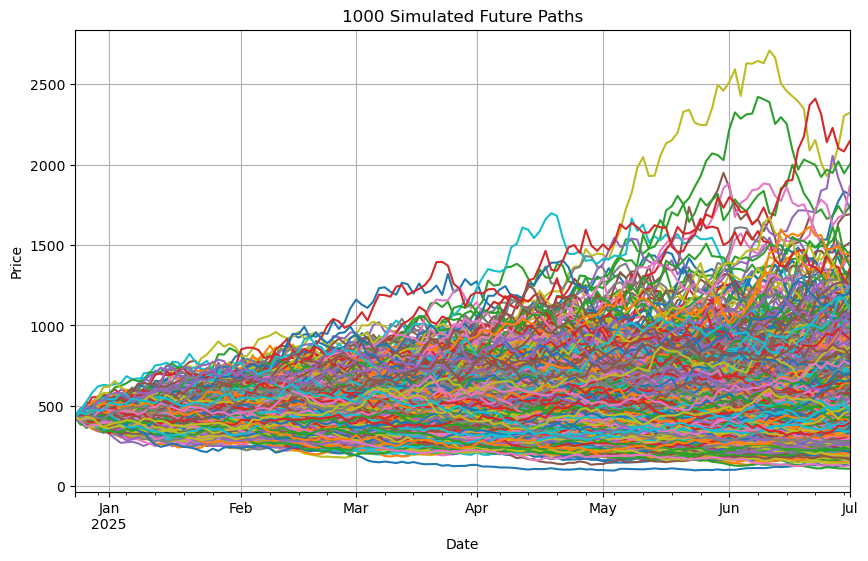

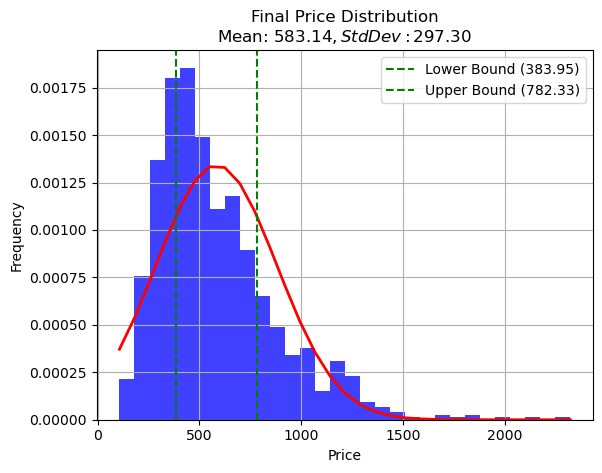

In [126]:
# Example usage
ticker = "TSLA"
import yfinance as yf
df = yf.download(ticker, period='5y')

# Ensure prediction end date is valid
pred_end_date = datetime.datetime(2025, 7, 1)

try:
    forecast_df, end_values_df = monte_carlo(pred_end_date, df)
    # Plot the final price distribution
    plot_norm_hist(end_values_df, vline=True, title=True)
except ValueError as e:
    print(e)

In [100]:
import numpy as np
import pandas as pd
from scipy.stats import norm

def monte_carlo(pred_end_date, df, iterations=1000):
    """
    Simulates future stock prices using the Monte Carlo method.

    Parameters:
        pred_end_date (datetime): The end date for the forecast.
        df (pd.DataFrame): Historical stock price data with a 'Close' column.
        iterations (int): Number of Monte Carlo iterations. Default is 1000.

    Returns:
        forecast_df (pd.DataFrame): Simulated future price paths.
        final_prices (np.ndarray): Final prices from each iteration.
    """
    # Validate the prediction end date
    last_date = df.index.max()
    if pred_end_date <= last_date:
        raise ValueError("Prediction end date must be later than the last available date.")

    # Generate business days for the forecast period
    forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), end=pred_end_date, freq='B')
    if not forecast_dates.size:
        raise ValueError("No forecast dates generated. Check the input date range.")

    # Calculate log returns
    log_returns = np.log(1 + df['Close'].pct_change().dropna())

    # Calculate drift and volatility
    drift = log_returns.mean() - 0.5 * log_returns.var()
    stdev = log_returns.std()

    # Generate daily returns
    daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(len(forecast_dates), iterations)))

    # Simulate price paths using cumulative product
    initial_price = df['Close'].iloc[-1]
    price_paths = initial_price * np.cumprod(daily_returns, axis=0)

    # Insert the initial price as the first row
    price_paths = np.vstack([np.full(iterations, initial_price), price_paths])

    # Create a DataFrame for the results
    forecast_df = pd.DataFrame(price_paths, index=pd.Index([last_date] + forecast_dates.tolist()))

    # Return the DataFrame and the final simulated prices
    return forecast_df, forecast_df.iloc[-1].values


In [102]:
# Example usage
ticker = "TSLA"
import yfinance as yf
df = yf.download(ticker, period='5y')

# Ensure prediction end date is valid
pred_end_date = datetime.datetime(2025, 7, 1)

try:
    forecast_df, end_values_df = monte_carlo(pred_end_date, df)
    # Plot the final price distribution
    plot_norm_hist(end_values_df, vline=True, title=True)
except ValueError as e:
    print(e)

[*********************100%***********************]  1 of 1 completed

Length of values (136) does not match length of index (1)


In [108]:
import numpy as np
import pandas as pd
from scipy.stats import norm

def monte_carlo(pred_end_date, df, iterations=1000, plot=True):
    """
    Simulates future stock prices using the Monte Carlo method.

    Parameters:
        pred_end_date (datetime): The end date for the forecast.
        df (pd.DataFrame): Historical stock price data with a 'Close' column.
        iterations (int): Number of Monte Carlo iterations. Default is 1000.
        plot (bool): Whether to plot the simulated paths. Default is True.

    Returns:
        forecast_df (pd.DataFrame): Simulated future price paths.
        final_prices (np.ndarray): Final prices from each iteration.
    """
    # Validate the prediction end date
    last_date = df.index.max()
    if pred_end_date <= last_date:
        raise ValueError("Prediction end date must be later than the last available date.")

    # Generate business days for the forecast period
    forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), end=pred_end_date, freq='B')
    if not forecast_dates.size:
        raise ValueError("No forecast dates generated. Check the input date range.")

    # Calculate log returns
    log_returns = np.log(1 + df['Close'].pct_change().dropna())

    # Calculate drift and volatility
    drift = log_returns.mean() - 0.5 * log_returns.var()
    stdev = log_returns.std()

    # Generate daily returns
    daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(len(forecast_dates), iterations)))

    # Initialize price paths
    initial_price = df['Close'].iloc[-1]
    price_paths = np.zeros_like(daily_returns)
    price_paths[0] = initial_price

    # Simulate price paths
    for t in range(1, len(forecast_dates)):
        price_paths[t] = price_paths[t - 1] * daily_returns[t]

    # Create a DataFrame for the results
    forecast_df = pd.DataFrame(price_paths, index=forecast_dates)

    # Return the DataFrame and the final simulated prices
    return forecast_df, forecast_df.iloc[-1].values


[*********************100%***********************]  1 of 1 completed


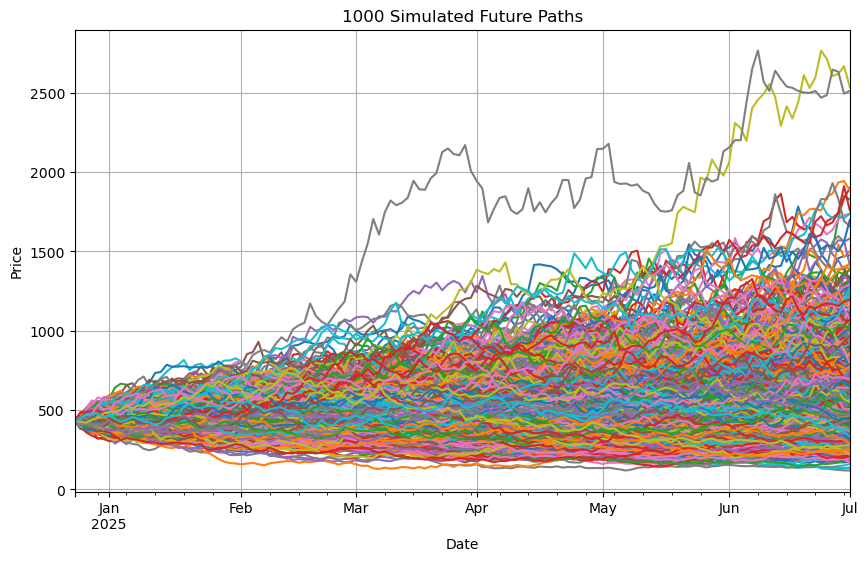

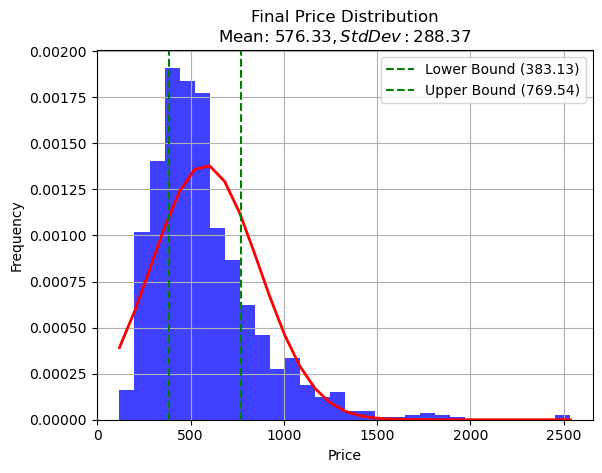

In [130]:
# Example usage
ticker = "TSLA"
import yfinance as yf
df = yf.download(ticker, period='5y')

# Ensure prediction end date is valid
pred_end_date = datetime.datetime(2025, 7, 1)

try:
    forecast_df, end_values_df = monte_carlo(pred_end_date, df)
    # Plot the final price distribution
    plot_norm_hist(end_values_df, vline=True, title=True)
except ValueError as e:
    print(e)

In [128]:
def plot_norm_hist(s, vline=True, title=True):
    """
    Plots a histogram of the given data with a normal distribution overlay.

    Parameters:
        s (array-like): Input data (e.g., simulated final prices) to plot.
        vline (bool): Whether to include vertical lines at ±0.67 standard deviations. Default is True.
        title (bool): Whether to display a title with mean and standard deviation. Default is True.

    Returns:
        None: Displays the histogram with the normal distribution overlay.
    """
    mu, sigma = np.mean(s), np.std(s)  # Mean and standard deviation

    # Plot histogram and normal distribution
    count, bins, ignored = plt.hist(s, bins=30, density=True, alpha=0.75, color='blue')
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
             np.exp(-(bins - mu)**2 / (2 * sigma**2)),
             linewidth=2, color='red')

    # Add vertical lines for ±0.67σ (arbitrary choice for spread)
    if vline:
        lline = -0.67 * sigma + mu
        uline = 0.67 * sigma + mu
        plt.axvline(lline, color='green', linestyle='--', label=f"Lower Bound ({lline:.2f})")
        plt.axvline(uline, color='green', linestyle='--', label=f"Upper Bound ({uline:.2f})")

    # Add title and labels
    if title:
        plt.title(f"Final Price Distribution\nMean: ${mu:.2f}, Std Dev: ${sigma:.2f}")
    plt.xlabel("Price")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.savefig("hist.png")

    plt.show()
